In [1]:
from elasticsearch import Elasticsearch
import pandas as pd

# Define the Elasticsearch client
es = Elasticsearch([{'host': 'localhost', 'port':9200, 'scheme':'http'}])


In [2]:
# retrieving netflix_movie index
netflix_movie = es.indices.get(index="netflix_movie")
# showing the first 5 document

In [3]:
# Define the query to get 5 random documents
query = {
    "query": {
        "function_score": {
            "query": {"match_all": {}}
        }
    }
}

# Perform the search
response = es.search(index="netflix_movie", body=query)

total_hits = response['hits']['total']['value']
print(f"Total hits: {total_hits}")
# Print the documents
df = pd.DataFrame([hit['_source'] for hit in response['hits']['hits']])
df


Total hits: 8805


,duration,listed_in,country,date_added,show_id,director,release_year,rating,description,type,title,cast
0,90 min,Documentaries,United States,"September 25, 2021",s1,Kirsten Johnson,2020,PG-13,"As her father nears the end of his life, filmm...",Movie,Dick Johnson Is Dead,NaN
1,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries",South Africa,"September 24, 2021",s2,NaN,2021,TV-MA,"After crossing paths at a party, a Cape Town t...",TV Show,Blood & Water,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban..."
2,1 Season,"Crime TV Shows, International TV Shows, TV Act...",NaN,"September 24, 2021",s3,Julien Leclercq,2021,TV-MA,To protect his family from a powerful drug lor...,TV Show,Ganglands,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi..."
3,1 Season,"Docuseries, Reality TV",NaN,"September 24, 2021",s4,NaN,2021,TV-MA,"Feuds, flirtations and toilet talk go down amo...",TV Show,Jailbirds New Orleans,NaN
4,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",India,"September 24, 2021",s5,NaN,2021,TV-MA,In a city of coaching centers known to train I...,TV Show,Kota Factory,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K..."
5,1 Season,"TV Dramas, TV Horror, TV Mysteries",NaN,"September 24, 2021",s6,Mike Flanagan,2021,TV-MA,The arrival of a charismatic young priest brin...,TV Show,Midnight Mass,"Kate Siegel, Zach Gilford, Hamish Linklater, H..."
6,91 min,Children & Family Movies,NaN,"September 24, 2021",s7,"Robert Cullen, José Luis Ucha",2021,PG,Equestria's divided. But a bright-eyed hero be...,Movie,My Little Pony: A New Generation,"Vanessa Hudgens, Kimiko Glenn, James Marsden, ..."
7,125 min,"Dramas, Independent Movies, International Movies","United States, Ghana, Burkina Faso, United Kin...","September 24, 2021",s8,Haile Gerima,1993,TV-MA,"On a photo shoot in Ghana, an American model s...",Movie,Sankofa,"Kofi Ghanaba, Oyafunmike Ogunlano, Alexandra D..."
8,9 Seasons,"British TV Shows, Reality TV",United Kingdom,"September 24, 2021",s9,Andy Devonshire,2021,TV-14,A talented batch of amateur bakers face off in...,TV Show,The Great British Baking Show,"Mel Giedroyc, Sue Perkins, Mary Berry, Paul Ho..."
9,104 min,"Comedies, Dramas",United States,"September 24, 2021",s10,Theodore Melfi,2021,PG-13,A woman adjusting to life after a loss contend...,Movie,The Starling,"Melissa McCarthy, Chris O'Dowd, Kevin Kline, T..."


In [12]:
# updating a document in netflix_movie index
# Define the document ID
document_id = 'BcYdlo8BhNEZa1M4BqZY'

document_to_update = {'doc': {'title': 'The Queen\'s Gambit', 'type': 'series', 'director': 'Scott Frank',
                              'cast': ['Anya Taylor-Joy', 'Chloe Pirrie', 'Bill Camp'], 'country': 'United States',
                              'date_added': 'October 23, 2020', 'release_year': 2020, 'rating': 'TV-MA',
                              'duration': 'Limited Series',
                              'listed_in': 'International TV Shows, TV Dramas, TV Thrillers',
                              'description': 'In a 1950s orphanage, a young'}}
es.update(index="netflix_movie", id=document_id, body=document_to_update)

ObjectApiResponse({'_index': 'netflix_movie', '_id': 'BcYdlo8BhNEZa1M4BqZY', '_version': 2, 'result': 'updated', '_shards': {'total': 2, 'successful': 1, 'failed': 0}, '_seq_no': 8805, '_primary_term': 3})

In [ ]:
# deleting document
# Define the document ID
document_id = 'BcYdlo8BhNEZa1M4BqZY'
es.delete(index="netflix_movie", id=document_id)

<h3>Simple search</h3>

In [31]:
# searching for a document
# Define the search query
# query = {
#     "query": {
#         "match": {
#             "description": "To protect his"
#         }
#     }
# }
# query to match the description exactly and setting the size
query = {
    "query": {
        "match_phrase": {
            "description": "To protect his"
        }
    },
    "size": 20
}


# print the number of hits
print("Total hits:", response['hits']['total']['value'])
response = es.search(index="netflix_movie", body=query)
df = pd.DataFrame([hit['_source'] for hit in response['hits']['hits']])
df
# for hit in response['hits']['hits']:
#     print(hit['_source'])

Total hits: 13


,country,show_id,director,release_year,rating,description,type,title,duration,listed_in,cast,date_added
0,Egypt,s8667,Mohamed Hamdy,2018,TV-14,"To evade greedy pharmaceutical crooks, a medic...",Movie,Used Goods,95 min,"Action & Adventure, Comedies, International Mo...","Mohamed Ragab, Ayten Amer, Hassan Abdulfattah","September 1, 2019"
1,United States,s792,Ric Roman Waugh,2008,R,After killing a burglar while trying to protec...,Movie,Felon,104 min,"Action & Adventure, Dramas","Stephen Dorff, Val Kilmer, Harold Perrineau, M...","June 2, 2021"
2,China,s1081,Zhao Ji,2021,TV-14,While living as an ordinary deliveryman and mo...,Movie,New Gods: Nezha Reborn,118 min,"Action & Adventure, Anime Features, Internatio...","Yang Tianxiang, Zhang He, Xuan Xiaoming, Li Sh...","April 12, 2021"
3,Turkey,s2617,Kıvanç Baruönü,2016,TV-MA,When his jealous sister plots to wreck his eng...,Movie,Görümce,104 min,"Comedies, International Movies, Music & Musicals","Eda Ece, Dilşah Demir, Gupse Özay, Buğra Gülsoy","April 28, 2020"
4,Canada,s5520,NaN,2016,TV-Y7,"Magically transported from far-off Skullbania,...",TV Show,Fangbone,1 Season,"Kids' TV, TV Comedies","Taylor Abrahamse, Colin Doyle, Juan Chioran, K...","April 22, 2017"
5,United States,s6326,Ryan Coogler,2018,PG-13,"T'Challa, the superpowered new leader of the h...",Movie,Black Panther,135 min,"Action & Adventure, Sci-Fi & Fantasy","Chadwick Boseman, Michael B. Jordan, Lupita Ny...","September 4, 2018"
6,"United States, Sweden",s6446,John Curran,2017,PG-13,Senator Ted Kennedy watches his future unravel...,Movie,Chappaquiddick,106 min,Dramas,"Jason Clarke, Kate Mara, Ed Helms, Bruce Dern,...","October 1, 2018"
7,NaN,s4512,NaN,2018,TV-Y7,Saved from a plane crash and given supernatura...,TV Show,Edgar Rice Burroughs' Tarzan and Jane,2 Seasons,"Crime TV Shows, Kids' TV","Marci T. House, Michael Dobson, Omari Newton, ...","October 12, 2018"
8,India,s2127,Ashutosh Gowariker,2009,TV-PG,"To protect his family from ruin, Yogesh must m...",Movie,What's Your Raashee?,203 min,"Comedies, International Movies, Music & Musicals","Harman Baweja, Priyanka Chopra, Manju Singh, A...","August 15, 2020"
9,"United Kingdom, Germany, United States, France",s2554,"Damien Chazelle, Houda Benyamina, Laïla Marrak...",2020,TV-MA,The owner of a Paris jazz club gets tangled up...,TV Show,The Eddy,1 Season,"International TV Shows, TV Dramas","André Holland, Joanna Kulig, Amandla Stenberg,...","May 8, 2020"


<h3>Boolean query and 2 factor searching</h3>

In [20]:
# 2 factor searching
# Define the search query
query = {
    "query": {
        "bool": {
            "must": [
                {"match": {"title": "The Queen's Gambit"}},
                {"match": {"type": "series"}}
            ]
        }
    }
}
response = es.search(index="netflix_movie", body=query)
df = pd.DataFrame([hit['_source'] for hit in response['hits']['hits']])
df

,duration,listed_in,country,date_added,show_id,director,release_year,rating,description,type,title,cast
0,Limited Series,"International TV Shows, TV Dramas, TV Thrillers",United States,"October 23, 2020",s1,Scott Frank,2020,TV-MA,"In a 1950s orphanage, a young",series,The Queen's Gambit,"[Anya Taylor-Joy, Chloe Pirrie, Bill Camp]"


<h3>Multi-match query</h3>

In [21]:
# Define the search query
query = {
    "query": {
        "multi_match": {
            "query": "The Queen's Gambit",
            "fields": ["title", "description"]
        }
    }
}
response = es.search(index="netflix_movie", body=query)
df = pd.DataFrame([hit['_source'] for hit in response['hits']['hits']])
df

,duration,listed_in,cast,country,date_added,show_id,release_year,rating,description,type,title,director
0,59 min,Comedies,"David Spade, London Hughes, Fortune Feimster",United States,"December 13, 2020",s1554,2020,TV-MA,"David Spade, Fortune Feimster and London Hughe...",Movie,The Netflix Afterparty: The Best Shows of The ...,NaN
1,1 Season,TV Dramas,"Anya Taylor-Joy, Bill Camp, Marielle Heller, T...",United States,"October 23, 2020",s1805,2020,TV-MA,"In a 1950s orphanage, a young girl reveals an ...",TV Show,The Queen's Gambit,NaN
2,Limited Series,"International TV Shows, TV Dramas, TV Thrillers","[Anya Taylor-Joy, Chloe Pirrie, Bill Camp]",United States,"October 23, 2020",s1,2020,TV-MA,"In a 1950s orphanage, a young",series,The Queen's Gambit,Scott Frank
3,14 min,Documentaries,NaN,United States,"January 8, 2021",s1426,2021,TV-14,A fascinating character. Exquisite sets. A wig...,Movie,Creating The Queen's Gambit,NaN
4,87 min,Action & Adventure,"Dolph Lundgren, Corbin Bernsen, Louis Mandylor...","United States, Mexico","September 15, 2017",s7268,2017,TV-14,An ex-CIA contractor turned thief is forced to...,Movie,Larceny,R. Ellis Frazier
5,32 min,Comedies,"David Spade, London Hughes, Fortune Feimster, ...",NaN,"May 14, 2021",s889,2021,TV-14,"The comedic dream team from ""The Upshaws"" disc...",Movie,The Upshaws - The Afterparty,NaN
6,35 min,Comedies,"David Spade, London Hughes, Fortune Feimster",NaN,"May 7, 2021",s913,2021,TV-14,"Stars of ""The Circle"" drop by to discuss Seaso...",Movie,The Circle - The Afterparty,NaN
7,109 min,Music & Musicals,Barbra Streisand,United States,"November 22, 2017",s5159,2017,TV-14,Iconic songstress Barbra Streisand culminates ...,Movie,Barbra: The Music ... The Mem'ries ... The Magic!,"Barbra Streisand, Jim Gable"
8,201 min,"Action & Adventure, Sci-Fi & Fantasy","Elijah Wood, Ian McKellen, Liv Tyler, Viggo Mo...","New Zealand, United States","January 1, 2020",s8405,2003,PG-13,Aragorn is revealed as the heir to the ancient...,Movie,The Lord of the Rings: The Return of the King,Peter Jackson
9,1 Season,"Crime TV Shows, Docuseries, International TV S...",NaN,"Spain, Germany, Denmark, United States","January 1, 2020",s3068,2020,TV-MA,This docuseries details the suspicious death o...,TV Show,"Nisman: The Prosecutor, the President, and the...",Justin Webster


<h3>Numerical search</h3>

In [25]:
# Define the search query
query = {
    "query": {
        'bool':{
            "must": [
                {
                    "script": {
                        "script": {
                            "source": "doc['release_year'].value + doc['release_year'].value > 4040"
                        }
                    }
                }
            ]
        }
    }
}
response = es.search(index="netflix_movie", body=query)
print("Total hits:", response['hits']['total']['value'])
df = pd.DataFrame([hit['_source'] for hit in response['hits']['hits']])
df

Total hits: 592


,duration,listed_in,cast,country,date_added,show_id,release_year,rating,description,type,title,director
0,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",s2,2021,TV-MA,"After crossing paths at a party, a Cape Town t...",TV Show,Blood & Water,NaN
1,1 Season,"Crime TV Shows, International TV Shows, TV Act...","Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",s3,2021,TV-MA,To protect his family from a powerful drug lor...,TV Show,Ganglands,Julien Leclercq
2,1 Season,"Docuseries, Reality TV",NaN,NaN,"September 24, 2021",s4,2021,TV-MA,"Feuds, flirtations and toilet talk go down amo...",TV Show,Jailbirds New Orleans,NaN
3,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...","Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",s5,2021,TV-MA,In a city of coaching centers known to train I...,TV Show,Kota Factory,NaN
4,1 Season,"TV Dramas, TV Horror, TV Mysteries","Kate Siegel, Zach Gilford, Hamish Linklater, H...",NaN,"September 24, 2021",s6,2021,TV-MA,The arrival of a charismatic young priest brin...,TV Show,Midnight Mass,Mike Flanagan
5,91 min,Children & Family Movies,"Vanessa Hudgens, Kimiko Glenn, James Marsden, ...",NaN,"September 24, 2021",s7,2021,PG,Equestria's divided. But a bright-eyed hero be...,Movie,My Little Pony: A New Generation,"Robert Cullen, José Luis Ucha"
6,9 Seasons,"British TV Shows, Reality TV","Mel Giedroyc, Sue Perkins, Mary Berry, Paul Ho...",United Kingdom,"September 24, 2021",s9,2021,TV-14,A talented batch of amateur bakers face off in...,TV Show,The Great British Baking Show,Andy Devonshire
7,104 min,"Comedies, Dramas","Melissa McCarthy, Chris O'Dowd, Kevin Kline, T...",United States,"September 24, 2021",s10,2021,PG-13,A woman adjusting to life after a loss contend...,Movie,The Starling,Theodore Melfi
8,1 Season,"Crime TV Shows, Docuseries, International TV S...",NaN,NaN,"September 24, 2021",s11,2021,TV-MA,"Sicily boasts a bold ""Anti-Mafia"" coalition. B...",TV Show,"Vendetta: Truth, Lies and The Mafia",NaN
9,1 Season,"Crime TV Shows, International TV Shows, TV Act...","Sukollawat Kanarot, Sushar Manaying, Pavarit M...",NaN,"September 23, 2021",s12,2021,TV-MA,"Struggling to earn a living in Bangkok, a man ...",TV Show,Bangkok Breaking,Kongkiat Komesiri


<h3>Aggregations</h3>

,key,doc_count
0,TV-MA,3206
1,TV-14,2160
2,TV-PG,862
3,R,799
4,PG-13,490
5,TV-Y7,334
6,TV-Y,307
7,PG,287
8,TV-G,220
9,NR,80


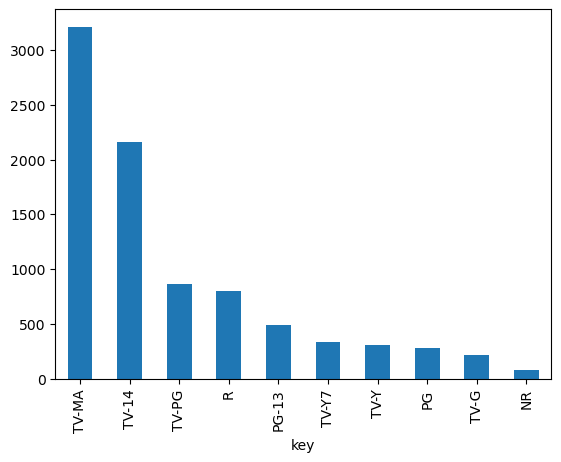

In [5]:
# Define the aggregation query
query = {
    "size": 0,
    "aggs": {
        "rating_count": {
            "terms": {
                "field": "rating"
            }
        }
    }
}
response = es.search(index="netflix_movie", body=query)
df = pd.DataFrame(response['aggregations']['rating_count']['buckets'])
df.plot(kind='bar', x='key', y='doc_count', legend=False)
df

<h3>Advance Aggregating</h3>

In [35]:
# Define the aggregation query
query = {
    "size": 0,
    "aggs": {
        "rating_count": {
            "terms": {
                "field": "rating"
            },
            "aggs": {
                "release_year": {
                    "min": {
                        "field": "release_year"
                    }
                }
            }
        }
    }
}
response = es.search(index="netflix_movie", body=query)
df = pd.DataFrame(response['aggregations']['rating_count']['buckets'])
df

,key,doc_count,release_year
0,TV-MA,3207,{'value': 1945.0}
1,TV-14,2160,{'value': 1925.0}
2,TV-PG,862,{'value': 1943.0}
3,R,799,{'value': 1962.0}
4,PG-13,489,{'value': 1955.0}
5,TV-Y7,334,{'value': 1981.0}
6,TV-Y,307,{'value': 1992.0}
7,PG,287,{'value': 1973.0}
8,TV-G,220,{'value': 1954.0}
9,NR,80,{'value': 1958.0}


<h3>Using Elasticsearch_dsl library</h3>

In [36]:
! pip install elasticsearch_dsl

In [5]:
from elasticsearch_dsl import Search, Q, A

# Define the search query
s = Search(using=es, index="netflix_movie").query("match", duration="Limited Series")
response = s.execute()
for i in response:
    print(i.country)

United States


In [7]:
s = s.query("bool", must=[Q("match", title="The Queen's Gambit"), Q("match", type="series")])
response = s.execute()
for i in response:
    print(i.title, "\n", i.type, "\n", i.director, "\n", i.cast)

The Queen's Gambit 
 series 
 Scott Frank 
 ['Anya Taylor-Joy', 'Chloe Pirrie', 'Bill Camp']


In [6]:
from elasticsearch.helpers import bulk, scan

# Define the search query
query = {
    "query": {
        "bool": {
            "must": [
                {"match_phrase": {"description": "to protect his"}},
                {"match": {"type": "Movie"}}
            ]
        }
    }
}

scroll = scan(es, query=query, index="netflix_movie")
# converting to dataframe
df = pd.DataFrame([hit['_source'] for hit in scroll])
df

,country,show_id,director,release_year,rating,description,type,title,duration,listed_in,cast,date_added
0,United States,s792,Ric Roman Waugh,2008,R,After killing a burglar while trying to protec...,Movie,Felon,104 min,"Action & Adventure, Dramas","Stephen Dorff, Val Kilmer, Harold Perrineau, M...","June 2, 2021"
1,China,s1081,Zhao Ji,2021,TV-14,While living as an ordinary deliveryman and mo...,Movie,New Gods: Nezha Reborn,118 min,"Action & Adventure, Anime Features, Internatio...","Yang Tianxiang, Zhang He, Xuan Xiaoming, Li Sh...","April 12, 2021"
2,India,s2127,Ashutosh Gowariker,2009,TV-PG,"To protect his family from ruin, Yogesh must m...",Movie,What's Your Raashee?,203 min,"Comedies, International Movies, Music & Musicals","Harman Baweja, Priyanka Chopra, Manju Singh, A...","August 15, 2020"
3,Turkey,s2617,Kıvanç Baruönü,2016,TV-MA,When his jealous sister plots to wreck his eng...,Movie,Görümce,104 min,"Comedies, International Movies, Music & Musicals","Eda Ece, Dilşah Demir, Gupse Özay, Buğra Gülsoy","April 28, 2020"
4,United States,s6326,Ryan Coogler,2018,PG-13,"T'Challa, the superpowered new leader of the h...",Movie,Black Panther,135 min,"Action & Adventure, Sci-Fi & Fantasy","Chadwick Boseman, Michael B. Jordan, Lupita Ny...","September 4, 2018"
5,"United States, Sweden",s6446,John Curran,2017,PG-13,Senator Ted Kennedy watches his future unravel...,Movie,Chappaquiddick,106 min,Dramas,"Jason Clarke, Kate Mara, Ed Helms, Bruce Dern,...","October 1, 2018"
6,Hong Kong,s7679,Chia Tang,1984,TV-MA,"Leader of the Ten Kwangtung Tigers, Tieh Chiao...",Movie,Opium and the Kung Fu Master,86 min,"Action & Adventure, International Movies","Lung Ti, Te-Lo Mai, Leanne Liu, Kuan Tai Chen,...","August 16, 2018"
7,Egypt,s8667,Mohamed Hamdy,2018,TV-14,"To evade greedy pharmaceutical crooks, a medic...",Movie,Used Goods,95 min,"Action & Adventure, Comedies, International Mo...","Mohamed Ragab, Ayten Amer, Hassan Abdulfattah","September 1, 2019"


In [13]:
# Create the index with the mapping

index_name = "my_index"
index_setting = {
    "settings": {
        "number_of_shards": 1,
        "number_of_replicas": 0
    },
    "mapping": {
        "mappings": {
            "properties": {
                "title": {"type": "text"},
                "author": {"type": "keyword"},
                "published_date": {"type": "date"},
            }
        }
    }
}
response = es.indices.create(index=index_name, body=index_setting)

# Check the response
if response["acknowledged"]:
    print(f"Index '{index_name}' created successfully!")
else:
    print(f"Failed to create index '{index_name}': {response['error']['reason']}")

Index 'my_index' created successfully!


In [20]:
index_name = "my_index"

# Perform the search with size set to 0
response = es.search(index=index_name, size=0)

# Get the total number of documents
total_documents = response["hits"]["total"]["value"]

print(f"Total documents in index '{index_name}': {total_documents}")

Total documents in index 'my_index': 0


In [11]:
response = es.indices.get(index=index_name)

# Check the response for success
if response:
    # Access index information from the response dictionary
    print(f"Index '{index_name}' details:")
    print(response)
else:
    print(f"Error retrieving index: Index '{index_name}' may not exist.")

Index 'my_index' details:
{'my_index': {'aliases': {}, 'mappings': {'properties': {'author': {'type': 'keyword'}, 'name': {'type': 'text', 'fields': {'keyword': {'type': 'keyword', 'ignore_above': 256}}}, 'published_date': {'type': 'date'}, 'title': {'type': 'text'}}}, 'settings': {'index': {'routing': {'allocation': {'include': {'_tier_preference': 'data_content'}}}, 'number_of_shards': '1', 'provided_name': 'my_index', 'creation_date': '1713094550437', 'number_of_replicas': '2', 'uuid': 'ILdh9jRPSiaO7Sok3mmC5g', 'version': {'created': '8070199'}}}}}


<h3>Creating an index for vector searching</h3>

In [12]:
index_name = "netflix_movie_vector"
index_settings = {
    "settings": {
        "number_of_shards": 1,
        "number_of_replicas": 0
    },
    "mappings": {
        "properties": {
            "title": {"type": "text"},
            "description": {"type": "text"},
            "description_vector": {
                "type": "dense_vector",
                "dims": 384,  # 384-dimensional vector for BERT embeddings
                "index": True,  # Enable indexing for k-NN search
                "similarity": "dot_product"  # Set similarity method
            }
        }
    }
}

# Create the index if it doesn't exist
if not es.indices.exists(index=index_name):
    es.indices.create(index=index_name, body=index_settings)
    print(f"Index '{index_name}' created")
else:
    print(f"Index '{index_name}' already exists")

Index 'netflix_movie_vector' created


In [12]:
from transformers import AutoTokenizer, AutoModel
import torch

# Load pre-trained BERT model and tokenizer
model_name = 'gpt2'
tokenizer = AutoTokenizer.from_pretrained(model_name)
model = AutoModel.from_pretrained(model_name)

# def embed_text(text):
#     inputs = tokenizer(text, return_tensors='pt', padding=True, truncation=True, max_length=512)
#     with torch.no_grad():
#         embeddings = model(**inputs).last_hidden_state.mean(dim=1)
#     return embeddings.squeeze().tolist()

# retrieving some descriptions and titles from netflix_movie index
query = {
    "query": {
        "match_all": {}
    },
    "size": 100
}
response = es.search(index="netflix_movie", body=query)
descriptions = [hit['_source']['description'] for hit in response['hits']['hits']]
titles = [hit['_source']['title'] for hit in response['hits']['hits']]

# Convert descriptions to vectors
description_vectors = [model.encode(desc).tolist() for desc in descriptions]

100%|██████████| 548118077/548118077 [05:02<00:00, 1812241.43B/s] 


AttributeError: 'GPT2Model' object has no attribute 'encode'

In [13]:
from sentence_transformers import SentenceTransformer

model_name = 'sentence-transformers/paraphrase-MiniLM-L6-v2'
model = SentenceTransformer(model_name)

# Fetch existing documents from the 'netflix_movie' index
query = {
    "query": {
        "match_all": {}
    },
    "size": 100  # Adjust the size as needed
}

response = es.search(index="netflix_movie", body=query)
descriptions = [hit['_source']['description'] for hit in response['hits']['hits']]
titles = [hit['_source']['title'] for hit in response['hits']['hits']]

# Generate embedding vectors for each description
description_vectors = [model.encode(desc).tolist() for desc in descriptions]

# Prepare documents for bulk indexing
documents = [
    {
        "_index": index_name,
        "_source": {
            "title": title,
            "description": description,
            "description_vector": description_vector
        }
    }
    for title, description, description_vector in zip(titles, descriptions, description_vectors)
]

# Index documents in bulk
bulk(es, documents)
print(f"{len(documents)} documents indexed into '{index_name}'")

C:\Users\ALFA RAYAN\anaconda3\Lib\site-packages\huggingface_hub\file_download.py:1132: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(


BulkIndexError: 100 document(s) failed to index.

In [16]:
# printing index size
response = es.search(index=index_name, size=0)
total_documents = response["hits"]["total"]["value"]
print(f"Total documents in index '{index_name}': {total_documents}")

Total documents in index 'netflix_movie_vector': 200


In [14]:
bulk(es, documents)

BulkIndexError: 100 document(s) failed to index.

In [9]:
# Define the query description and convert it to a vector
query_description = "A man struggling to find his way in life..."
query_vector = model.encode(query_description).tolist()

# Define the k-NN search query
knn_query = {
    "knn": {
        "field": "description_vector",
        "query_vector": query_vector,
        "k": 3,  # Retrieve the 3 nearest neighbors
        "num_candidates": 10  # Number of candidates to consider for k-NN search
    }
}

# Perform the k-NN search using the _knn_search endpoint
response = es.knn_search(index=index_name, body=knn_query)

# Print the search results
search_results = []
for hit in response['hits']['hits']:
    search_results.append(hit["_source"])

for result in search_results:
    print(result)

BadRequestError: BadRequestError(400, 'search_phase_execution_exception', 'failed to create query: to perform knn search on field [description_vector], its mapping must have [index] set to [true]')

In [23]:
# Creating documents to be indexed
documents = []
# define action for the bulk indexing
def create_document(title, description, description_vector):
    return {
        "_index": index_name,
        "_source": {
            "title": title,
            "description": description,
            "description_vector": description_vector
        }
    }

# Create documents for indexing
for title, description, description_vector in zip(titles, descriptions, description_vectors):
    documents.append(create_document(title, description, description_vector))
    
    
# Index the documents one by one
# Index the documents one by one
for doc in documents:
    es.index(index=index_name, body=doc["_source"])

BadRequestError: BadRequestError(400, 'mapper_parsing_exception', 'failed to parse')